In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
import random

In [ ]:
# function for changing the matrix into numpy matrix

def change(mat):
  ans = np.zeros((len(mat),len(mat[0])))
  for i in range(len(mat)):
    for j in range(len(mat[0])):
      ans[i][j] = mat[i][j]
  return ans


# function for transpose of a matrix
def transpose(mat):
  transpose = np.zeros((len(mat[0]),len(mat)))
  for i in range(len(mat[0])):
    for j in range(len(mat)):
      transpose[i][j] = mat[j][i]
  return transpose

# function for getting usermatrix
def getmatrix(degree,usermat):
  finalans = list()
  for itr in range(len(usermat)):
      x1 = float(usermat[itr][0])
      x2 = float(usermat[itr][1])
      p = list()
      for powr in range(degree+1):
          power = degree - powr
          for i in range(power+1):
              j = power-i
              p.append((x1**j)*(x2**i))
      finalans.append(p)
  finalX = np.zeros((len(finalans),len(finalans[0])))
  for i in range(len(finalans)):
    for j in range(len(finalans[0])):
      finalX[i][j] = finalans[i][j]
  return finalX


def getmatrix1(degree,usermat):
  finalans = list()
  for itr in range(len(usermat)):
    x = float(usermat[itr][0])
    p = list()
    for powr in range(degree,-1,-1):
      p.append(x**powr)
    finalans.append(p)
  finalX = np.zeros((len(finalans),len(finalans[0])))
  for i in range(len(finalans)):
    for j in range(len(finalans[0])):
      finalX[i][j] = finalans[i][j]
  return finalX

# function for Getting Beta Matrix
def GetBeta(degree,usermat,giveny):
  X = list()
  for itr in range(len(usermat)):
      x1 = float(usermat[itr][0])
      x2 = float(usermat[itr][1])
      p = list()
      for powr in range(degree+1):
          power = degree - powr
          for i in range(power+1):
              j = power-i
              p.append((x1**j)*(x2**i))
      X.append(p)
  finalX = np.zeros((len(X),len(X[0])))
  for i in range(len(X)):
    for j in range(len(X[0])):
      finalX[i][j] = X[i][j]
  Y = np.zeros((len(giveny),len(giveny[0])))

  for i in range(len(giveny)):
    for j in range(len(giveny[0])):
      Y[i][j] = giveny[i][j]

  transmat = transpose(X)
  product1 = transmat @ X
  #print(np.linalg.det(product1))
  inverse = np.linalg.inv(product1)
  product2 = inverse @ transmat
  Beta = product2 @ Y
  return Beta

def GetBeta1(deg,X,giveny):
  print(len(giveny))
  print(len(giveny[0]))
  Y = np.zeros((len(giveny),len(giveny[0])))
  for i in range(len(giveny)):
    for j in range(len(giveny[0])):
      Y[i][j] = giveny[i][j]
  transmat = np.transpose(X)
  product1 = transmat @ X
  # print(len(product1))
  #print(np.linalg.det(product1))
  inverse = np.linalg.inv(product1)
  # print(len(inverse))
  # print(len(inverse[0]))
  product2 = inverse @ transmat
  # print(len(product2))
  # print(len(product2[0]))
  # print(len(Y))
  # print(len(Y[0]))
  Beta = product2 @ Y

  return Beta

# Function for Getting Beta with a Lambda(ridge regression)
def GetBetaforLambda(lamb,degree,usermat,giveny):
  X = list()
  for itr in range(len(usermat)):
      x1 = float(usermat[itr][0])
      x2 = float(usermat[itr][1])
      p = list()
      for powr in range(degree+1):
          power = degree - powr
          for i in range(power+1):
              j = power-i
              p.append((x1**j)*(x2**i))
      X.append(p)
  finalX = np.zeros((len(X),len(X[0])))
  for i in range(len(X)):
    for j in range(len(X[0])):
      finalX[i][j] = X[i][j]
  Y = np.zeros((len(giveny),len(giveny[0])))

  for i in range(len(giveny)):
    for j in range(len(giveny[0])):
      Y[i][j] = giveny[i][j]

  transmat = transpose(X)
  product1 = transmat @ X
  for i in range(len(product1)):
    product1[i][i] = product1[i][i] + lamb
  inverse = np.linalg.pinv(product1)
  product2 = inverse @ transmat
  Beta = product2 @ Y
  return Beta

# function for Mean Square Error
def MeanSquareError(beta,X,Y):
    predicted = X @ beta
    totalerr = 0
    for i in range(len(X)):
        totalerr = totalerr + (Y[i] - predicted[i])**2
    return float(totalerr/len(X))




In [ ]:
trainpointer = open('train22.csv','r')

# Splitting the given train data into train data and validation data
totalx = list()
totaly = list()
trainx = list()
trainy = list()
validationx = list()
validationy = list()
for x in trainpointer:
  temp = x.strip().split(',')
  tempx = list()
  tempx.append(float(temp[0]))
  tempx.append(float(temp[1]))
  totalx.append(tempx)
  tempy = list()
  tempy.append(float(temp[2]))
  totaly.append(tempy)

length = len(totalx)
trainlength = int(0.8 * length)
validationlength = length - trainlength

trainx = totalx[0:trainlength]
for i in range(trainlength):
  trainy.append(totaly[i])

validationx = totalx[trainlength:]
validationy = totaly[trainlength:]

63
1
63
1
63
1
63
1
63
1
63
1
63
1
63
1
63
1
63
1


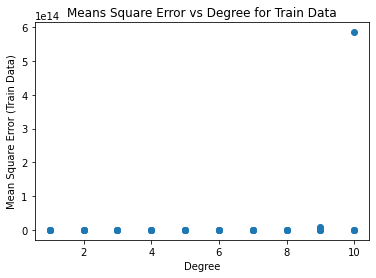

In [ ]:
for deg in range(1,11):
  trainx1 = list()
  for x in trainx:
    temp = list()
    temp.append(x[0])
    trainx1.append(temp)
  Xtrain = getmatrix1(deg,trainx1)
  beta = GetBeta1(deg,Xtrain,trainy)
  Ytrain = np.zeros((len(trainy),1))
  for x in range(len(trainy)):
    Ytrain[x] = trainy[x])
  errtrain = MeanSquareError(beta,Xtrain,)
  msefortrain.append(errtrain)
  degree.append(deg)

  # if minmseforvalidation > errvalidation:
  #   minmseforvalidation = errvalidation
  #   bestdegree = deg

# plotting Mean Square Error vs Degree for Train Data
fig1,gphtrain = plt.subplots()
gphtrain.scatter(degree,msefortrain)
gphtrain.set_xlabel('Degree')
gphtrain.set_ylabel('Mean Square Error (Train Data)')
gphtrain.set_title('Means Square Error vs Degree for Train Data')
plt.savefig('myplot.png')
plt.show()

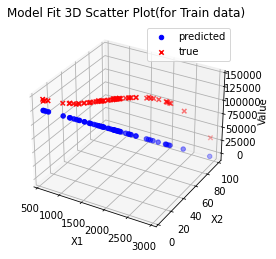

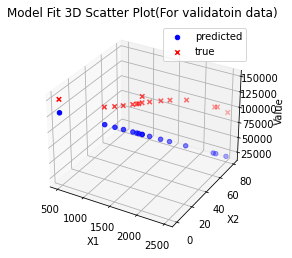

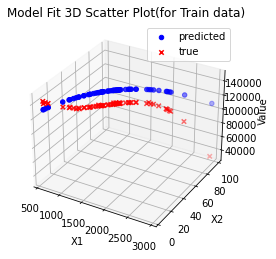

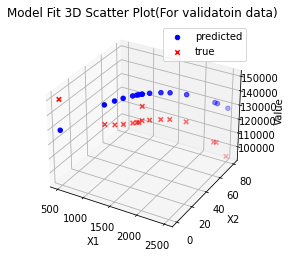

In [ ]:
# Answer for Question 1 Part A point 1
X = getmatrix(1,trainx)
X = np.asarray(X)
beta = GetBeta(1,trainx,trainy)
Y_pred = np.dot(X,beta)
X1 = list()
X2 = list()
for t in trainx:
  X1.append(t[0])
  X2.append(t[1])
Y = np.asarray(trainy)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
# print(len(X1))
# print(len(X2))
# print(len(Y_pred))
# print(len(Y))
ax.scatter(X1,X2,Y_pred,c='b',label='predicted')
ax.scatter(X1,X2,Y,c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Value')
ax.set_title('Model Fit 3D Scatter Plot(for Train data)')
ax.legend()
plt.show()


X = getmatrix(1,validationx)
X = np.asarray(X)
beta = GetBeta(1,trainx,trainy)
Y_pred = np.dot(X,beta)
X1 = list()
X2 = list()
for t in validationx:
  X1.append(t[0])
  X2.append(t[1])
Y = np.asarray(validationy)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
# print(len(X1))
# print(len(X2))
# print(len(Y_pred))
# print(len(Y))
ax.scatter(X1,X2,Y_pred,c='b',label='predicted')
ax.scatter(X1,X2,Y,c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Value')
ax.set_title('Model Fit 3D Scatter Plot(For validatoin data)')
ax.legend()
plt.show()


X = getmatrix(2,trainx)
X = np.asarray(X)
beta = GetBeta(2,trainx,trainy)
Y_pred = np.dot(X,beta)
X1 = list()
X2 = list()
for t in trainx:
  X1.append(t[0])
  X2.append(t[1])
Y = np.asarray(trainy)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
# print(len(X1))
# print(len(X2))
# print(len(Y_pred))
# print(len(Y))
ax.scatter(X1,X2,Y_pred,c='b',label='predicted')
ax.scatter(X1,X2,Y,c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Value')
ax.set_title('Model Fit 3D Scatter Plot(for Train data)')
ax.legend()
plt.show()


X = getmatrix(2,validationx)
X = np.asarray(X)
beta = GetBeta(2,trainx,trainy)
Y_pred = np.dot(X,beta)
X1 = list()
X2 = list()
for t in validationx:
  X1.append(t[0])
  X2.append(t[1])
Y = np.asarray(validationy)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
# print(len(X1))
# print(len(X2))
# print(len(Y_pred))
# print(len(Y))
ax.scatter(X1,X2,Y_pred,c='b',label='predicted')
ax.scatter(X1,X2,Y,c='r',marker='x',label='true')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Value')
ax.set_title('Model Fit 3D Scatter Plot(For validatoin data)')
ax.legend()
plt.show()




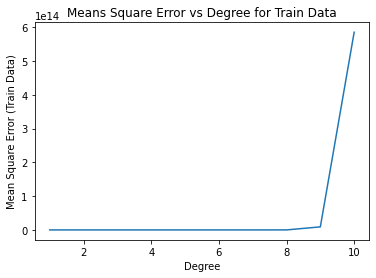

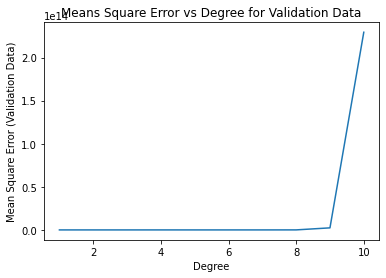

In [ ]:
# Below is the code for Question1 part A and second point
msefortrain = list()
mseforvalidation = list()
degree = list()
minmseforvalidation = sys.maxsize

for deg in range(1,11):
  Xvalidation = getmatrix(deg,validationx)
  Yvalidation = change(validationy)
  Xtrain = getmatrix(deg,trainx)
  Ytrain = change(trainy)
  beta = GetBeta(deg,trainx,trainy)

  errtrain = MeanSquareError(beta,Xtrain,Ytrain)
  errvalidation = MeanSquareError(beta,Xvalidation,Yvalidation)

  msefortrain.append(errtrain)
  mseforvalidation.append(errvalidation)
  degree.append(deg)

  if minmseforvalidation > errvalidation:
    minmseforvalidation = errvalidation
    bestdegree = deg

# plotting Mean Square Error vs Degree for Train Data
fig1,gphtrain = plt.subplots()
gphtrain.plot(degree,msefortrain)
gphtrain.set_xlabel('Degree')
gphtrain.set_ylabel('Mean Square Error (Train Data)')
gphtrain.set_title('Means Square Error vs Degree for Train Data')
plt.savefig('myplot.png')
plt.show()

#plotting Mean Sqaure Error vs Degree for Validation Data
fig2,gphvalidation = plt.subplots()
gphvalidation.plot(degree,mseforvalidation)
gphvalidation.set_xlabel('Degree')
gphvalidation.set_ylabel('Mean Square Error (Validation Data)')
gphvalidation.set_title('Means Square Error vs Degree for Validation Data')
plt.savefig('MSEvsDegree(test).png')
plt.show()


In [ ]:
# solution Question 1 Part A third point

print(f'Best Model is at Degree : {bestdegree}')
bestbeta = GetBeta(bestdegree,trainx,trainy)
Xbest = getmatrix(bestdegree,trainx)
Ybest = change(trainy)
bestmodelerrtrain = MeanSquareError(bestbeta,Xbest,Ybest)
print(f"Mean Square Error in Best Model for Train Data is {bestmodelerrtrain}")

# Reading data from test.csv

testpointer = open('test22.csv','r')

testx = list()
testy = list()
for x in testpointer:
  temp = x.strip().split(',')
  testx.append(temp[0:2])
  testy.append(temp[2:])

Xtest = getmatrix(bestdegree,testx)
Ytest = change(testy)
bestmodelerrtest = MeanSquareError(bestbeta,Xtest,Ytest)
print(f'Mean Square Error in Best Model for Test Data is {bestmodelerrtest}')

Best Model is at Degree : 3
Mean Square Error in Best Model for Train Data is 343903.44746282086
Mean Square Error in Best Model for Test Data is 752018.8307363805


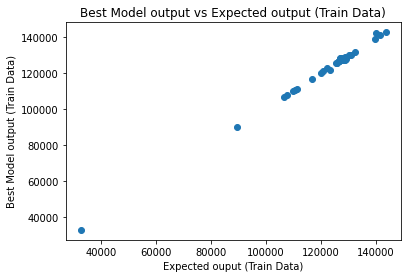

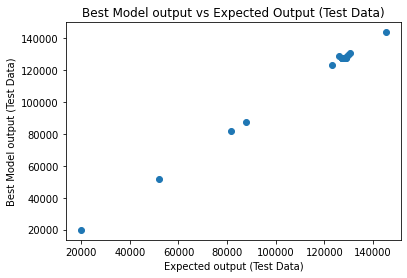

In [ ]:
# Solution for Question 1 point 4

# Plot of best model output vs expected output for train data

outputtrain = Xbest @ bestbeta

fig3,trainplot = plt.subplots()
trainplot.scatter(Ybest,outputtrain)
trainplot.set_xlabel('Expected ouput (Train Data)')
trainplot.set_ylabel('Best Model output (Train Data)')
trainplot.set_title('Best Model output vs Expected output (Train Data)')
plt.savefig('BESTvsExpectedTrain.png')
plt.show()

# Plot of Best Model Output vs Expected Output for Test data

outputtest = Xtest @ bestbeta

fig4,testplot = plt.subplots()
testplot.scatter(Ytest,outputtest)
testplot.set_xlabel('Expected output (Test Data)')
testplot.set_ylabel('Best Model output (Test Data)')
testplot.set_title('Best Model output vs Expected Output (Test Data)')
plt.savefig('BESTvsExpectedTest.png')
plt.show()


Degree at which the curve overfits is 1


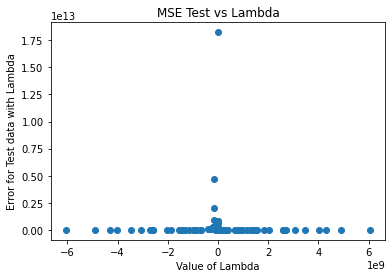

Error with Best Model with lambda for Train Data: 86815752.56551169
Error with Best Model with lambda for Test Data: 404080853.2129755


In [ ]:
# solution for Question 1 Part B for point 1 ,point 2 and point 3

ratio = sys.maxsize
overfitdeg= 0
for deg in range(1,11):
  Xtrain = getmatrix(deg,trainx)
  Ytrain = change(trainy)
  beta = GetBeta(deg,trainx,trainy)
  errtrain = MeanSquareError(beta,Xtrain,Ytrain)
  Xtest = getmatrix(deg,testx)
  Ytest = change(testy)
  errtest = MeanSquareError(beta,Xtest,Ytest)
  r = abs(errtrain)/abs(errtest)
  #print(r)
  if ratio > r:
    ratio = r
    overfitdeg = deg

print(f'Degree at which the curve overfits is {overfitdeg}')

# overfitdeg = 3
# taking 100 random values in the range of (-10e40,10e40)

lambdalist1 = list()
for i in range(200):
  f = random.random()
  lambdalist1.append(10*f)
  lambdalist1.append(-10*f)
lambdalist = list()
for i in lambdalist1:
  lambdalist.append((9.54)**i)
  lambdalist.append(-(9.54)**i)
testmsewithlambda = list()
Xtrainfit = getmatrix(overfitdeg,trainx)
Ytrainfit = change(trainy)
Xtestfit = getmatrix(overfitdeg,testx)
Ytestfit = change(testy)
Xvalidationfit = getmatrix(overfitdeg,validationx)
Yvalidationfit = change(validationy)
bestlambda = 0
minerrwithlambda = sys.maxsize


for lamb in lambdalist:
  beta = GetBetaforLambda(lamb,overfitdeg,trainx,trainy)
  lamberrtrain = MeanSquareError(beta,Xtrainfit,Ytrainfit)
  lamberrtest = MeanSquareError(beta,Xtestfit,Ytestfit)
  lamberrvalidation = MeanSquareError(beta,Xvalidationfit,Yvalidationfit)
  testmsewithlambda.append(lamberrtest)
  if minerrwithlambda > lamberrvalidation:
    minerrwithlambda = lamberrvalidation
    bestlambda = lamb

fig5,mslamb = plt.subplots()
mslamb.scatter(lambdalist,testmsewithlambda)
mslamb.set_xlabel('Value of Lambda')
mslamb.set_ylabel('Error for Test data with Lambda')
mslamb.set_title('MSE Test vs Lambda')
plt.savefig('MSEvsLambda.png')
plt.show()

# printing errors with best lambda for train and test data
bestbetawithlambda = GetBetaforLambda(bestlambda,overfitdeg,trainx,trainy)
print(f'Error with Best Model with lambda for Train Data: {MeanSquareError(bestbetawithlambda,Xtrainfit,Ytrainfit)}')

print(f'Error with Best Model with lambda for Test Data: {MeanSquareError(bestbetawithlambda,Xtestfit,Ytestfit)}')


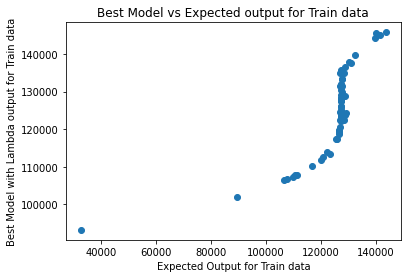

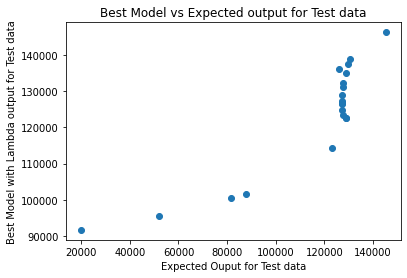

In [ ]:
# Solution for Question 1 part B point 4

Ybestlambdatrain = Xtrainfit @ bestbetawithlambda
Ybestlambdatest = Xtestfit @ bestbetawithlambda

# plotting for Train Data
fig7,lambplot = plt.subplots()
lambplot.scatter(Ytrainfit,Ybestlambdatrain)
lambplot.set_ylabel('Best Model with Lambda output for Train data')
lambplot.set_xlabel('Expected Output for Train data')
lambplot.set_title('Best Model vs Expected output for Train data')
plt.savefig('BESTvsExpectedTrainwithlambda.png')
plt.show()

# plotting for Test Data
fig8,lambplot1 = plt.subplots()
lambplot1.scatter(Ytestfit,Ybestlambdatest)
lambplot1.set_ylabel('Best Model with Lambda output for Test data')
lambplot1.set_xlabel('Expected Ouput for Test data')
lambplot1.set_title('Best Model vs Expected output for Test data')
plt.savefig('BESTvsExpectedTestwithlambda.png')
plt.show()
